<a href="https://colab.research.google.com/github/VitikaJain25/PandasRevision/blob/master/VisualizingLinearRelationshipsAndCorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
# For calculating correlation cofficients

In [3]:
from google.colab import files  #To read file from local
import io
uploaded = files.upload()   # To upload file from local.

bike_sharing_data = pd.read_csv(io.BytesIO(uploaded['bike_sharing_daily.csv']))

Saving bike_sharing_daily.csv to bike_sharing_daily.csv


In [4]:
bike_sharing_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
bike_sharing_data.shape

(731, 16)

In [6]:
bike_sharing_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Converting to date time format
bike_sharing_data['dteday'] = pd.DatetimeIndex(bike_sharing_data['dteday'])
bike_sharing_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [8]:
# Correlation Coefficients : Measure of statistical relationship that exist between 2 variables.
# Temperature and Count
np.corrcoef(bike_sharing_data['temp'], bike_sharing_data['cnt'])

# It is positively Correlated

array([[1.        , 0.62749401],
       [0.62749401, 1.        ]])

In [9]:
# Another way of finding correlation coeffficient
bike_sharing_data['temp'].corr(bike_sharing_data['cnt'])

0.6274940090334918

In [10]:
# Evaluates the linear relationship between 2 continous variable
# Same correlation coefficient can be calculated using scipy.
pearsonr(bike_sharing_data['temp'], bike_sharing_data['cnt'])

# This gives correlation coefficient and also the p value (a very small number)
# p values tell if the coefficient is significant or not.
# Smaller the p value, more significant the coefficient

(0.6274940090334922, 2.8106223975901364e-81)

In [11]:
# Based on the ranks of the variable rather than actual raw value - usually used with ordinal data.
spearmanr(bike_sharing_data['temp'], bike_sharing_data['cnt'])

SpearmanrResult(correlation=0.6220344732276183, pvalue=1.674554642260452e-79)

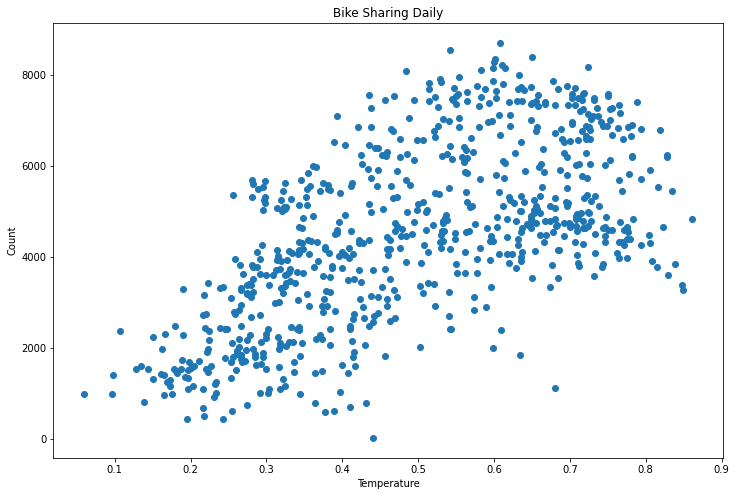

In [12]:
# correlation coefficient shows that there is some linear relationship 
plt.figure(figsize=(12,8))
plt.scatter(bike_sharing_data['temp'], bike_sharing_data['cnt'])
plt.title('Bike Sharing Daily')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()
# We can see a linear relationship using scatter plot

In [13]:
# Correlation coefficient is positive but the value is low
np.corrcoef(bike_sharing_data['workingday'], bike_sharing_data['registered'])

array([[1.        , 0.30390712],
       [0.30390712, 1.        ]])

In [14]:
bike_sharing_data['workingday'].corr(bike_sharing_data['registered'])

0.303907117045917

In [16]:
pearsonr(bike_sharing_data['workingday'], bike_sharing_data['registered'])

(0.3039071170459174, 4.3815710893705565e-17)

In [15]:
spearmanr(bike_sharing_data['workingday'], bike_sharing_data['registered'])

SpearmanrResult(correlation=0.3058584564758216, pvalue=2.6994118569378256e-17)

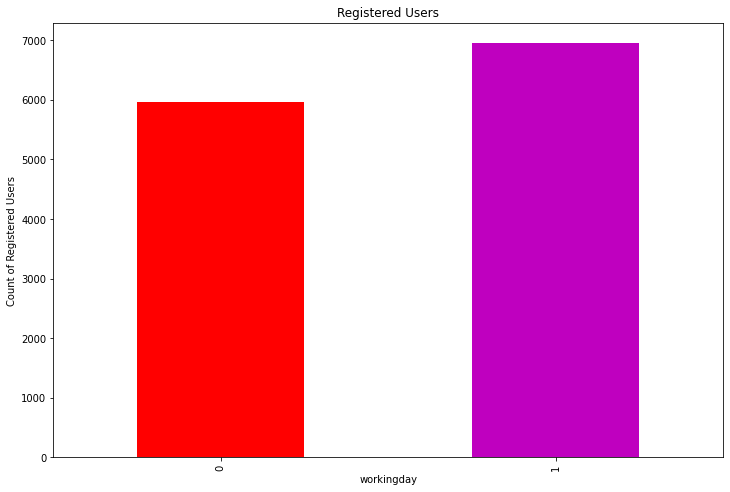

In [24]:
# Bar graph
# Registered users using bikes on working day vs a non working day
ax = plt.subplot()
bike_sharing_data.groupby('workingday').max()['registered'].plot(kind = 'bar', figsize = (12,8), ax = ax, color = ['r', 'm'])
plt.title('Registered Users')
plt.ylabel('Count of Registered Users')
plt.show()

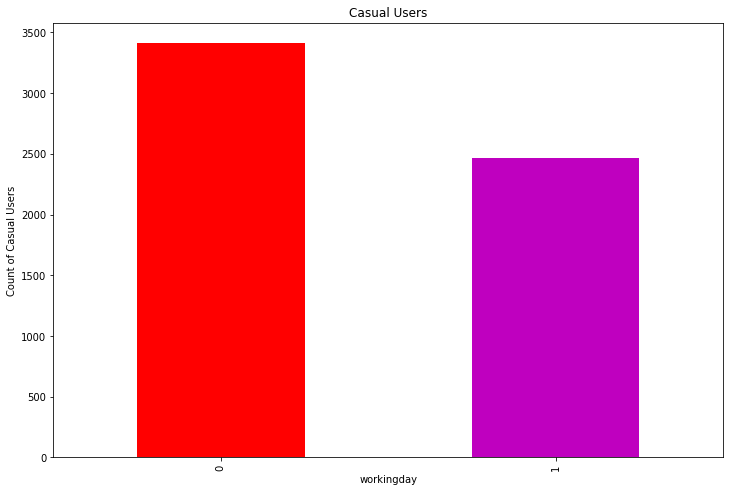

In [23]:
# Casual users using bikes on working day vs a non working day
ax = plt.subplot()
bike_sharing_data.groupby('workingday').max()['casual'].plot(kind = 'bar', figsize = (12,8), ax = ax, color = ['r', 'm'])
plt.title('Casual Users')
plt.ylabel('Count of Casual Users')
plt.show()

In [25]:
# Neagtive correlation
# When wind speeds are high, people tend not to ride bikes
np.corrcoef(bike_sharing_data['windspeed'], bike_sharing_data['cnt'])

array([[ 1.      , -0.234545],
       [-0.234545,  1.      ]])

In [26]:
bike_sharing_data['windspeed'].corr(bike_sharing_data['cnt'])

-0.23454499742166993

In [27]:
pearsonr(bike_sharing_data['windspeed'], bike_sharing_data['cnt'])

(-0.23454499742167, 1.3599586778869642e-10)

In [28]:
spearmanr(bike_sharing_data['windspeed'], bike_sharing_data['cnt'])

SpearmanrResult(correlation=-0.21719701027268842, pvalue=2.9694272867448183e-09)

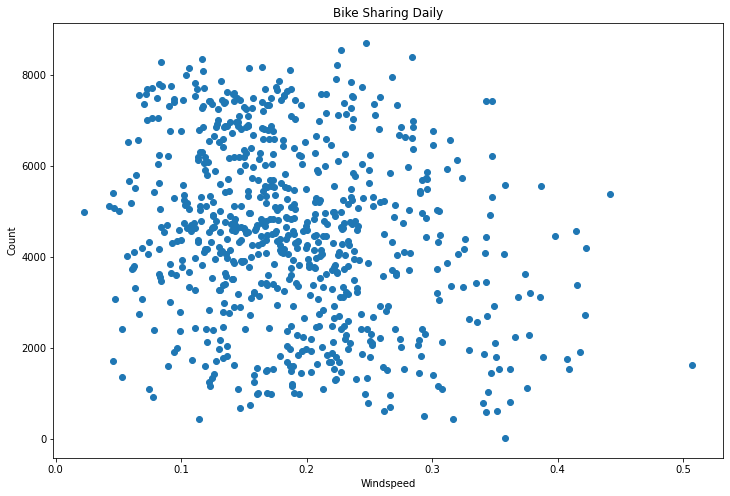

In [30]:
# correlation coefficient shows that there is some linear relationship 
plt.figure(figsize=(12,8))
plt.scatter(bike_sharing_data['windspeed'], bike_sharing_data['cnt'])
plt.title('Bike Sharing Daily')
plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.show()
# We can see a linear relationship using scatter plot

In [31]:
# To view all correlation coefficients across all of the pairs of variables in data
bike_sharing_data.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


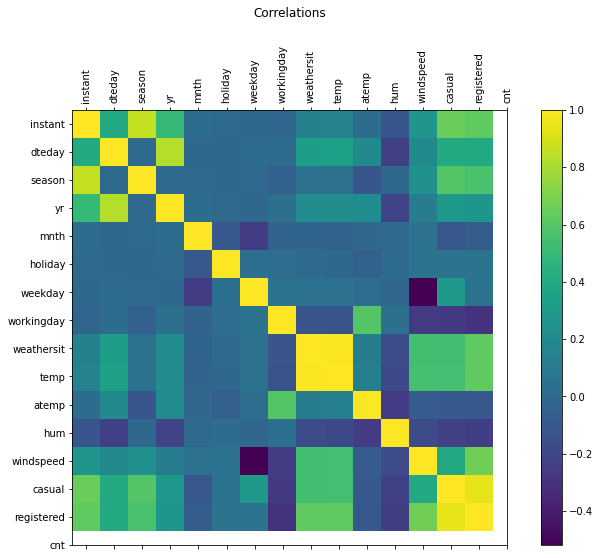

In [47]:
# Correlation Matrices can be visualized using HeatMap
plt.figure(figsize=(12,8))
plt.matshow(bike_sharing_data.corr(), fignum=False, aspect = 'equal')

columns = len(bike_sharing_data.columns)

plt.xticks(range(columns), bike_sharing_data.columns)
plt.yticks(range(columns), bike_sharing_data.columns)

plt.colorbar()
plt.xticks(rotation = 90)
plt.title('Correlations', y =1.2)

plt.show()

# Lighter color represent positive correlation

In [48]:
pip install yellowbrick

In [0]:
target = bike_sharing_data['cnt']
features = bike_sharing_data.drop(['casual', 'registered', 'cnt', 'dteday'], axis = 1)

In [52]:
# We can visualize the correlation between features and targets using 'FeatureCorrelation'
from yellowbrick.target import FeatureCorrelation

features_names = list(features.columns)
features_names

['instant',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed']

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


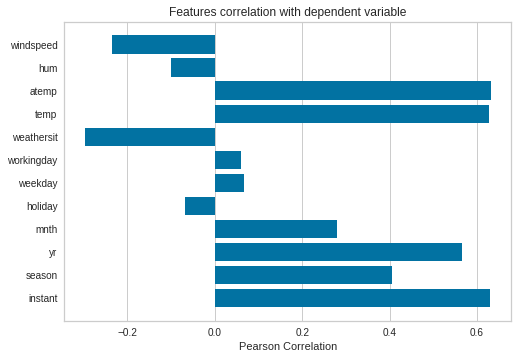

In [54]:
visualizer = FeatureCorrelation(labels = features_names)
visualizer.fit(features, target)
visualizer.poof()

# Bars towards right - Positively correlated
# Bars towards the left - Negatively correlated